<a href="https://colab.research.google.com/github/D03S08/DataMiningClassKelompok4/blob/main/TUGAS_1_DATA_MINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Library

In [355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Baca File

In [356]:
#File yang digunakan dalam bentuk CSV
harga_rumah = pd.read_csv('https://raw.githubusercontent.com/D03S08/DataMiningClassKelompok4/main/Tugas%2001%20Data%20Mining%20-%20Kelompok%204.csv')
harga_rumah.head(10)

,No,Tgl_Iklan,url,harga,Kota,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,judul,deskripsi
0,1,02-03-2021,https://www.rumah123.com/properti/bekasi/hos79...,2750000000,Bekasi,162.0,179,4,3.0,1,1,2,1,2200.0,SHM,RUMAH MAPLE Summarecon Bekasi JARANG ADA lebar...,RUMAH MAPLE Summarecon Bekasi JARANG ADA lebar...
1,2,02-03-2021,https://www.rumah123.com/properti/bekasi/hos43...,1850000000,Bekasi,119.0,126,2,2.0,0,0,1,1,2200.0,HGB,RUMAH Cluster BLUEBELL@Summarecon Bekasi Dekat...,RUMAH Cluster BLUEBELL @ Summarecon Bekasi Dek...
2,3,05-03-2021,https://www.rumah123.com/properti/bekasi/hos73...,825000000,Bekasi,128.0,65,3,2.0,0,0,1,0,2200.0,SHM,"Rumah Anti Virus, 3 Kamar, dekat waterpark, St...","Rumah Anti Virus *, 3 Kamar, Strategis di Jati..."
3,4,05-03-2021,https://www.rumah123.com/properti/bekasi/hos78...,3450000000,Bekasi,224.0,260,4,4.0,1,0,1,0,2200.0,SHM,Rumah Mewah Siap Huni di Jaka Permai Bekasi,DIJUAL & SIAP HUNI : Dijual Rumah di Perum Jak...
4,5,08-03-2021,https://www.rumah123.com/properti/bekasi/hos75...,700000000,Bekasi,77.0,50,3,2.0,0,0,1,0,2200.0,SHM,Hunian Cantik nan Asri NUCIFERA RESIDENCE,MILIKI HUNIAN CANTIK DESAIN MENARIK HATI\n\n*N...
5,6,10-03-2021,https://www.rumah123.com/properti/bekasi/hos78...,1100000000,Bekasi,81.0,144,3,2.0,1,1,1,0,2200.0,SHM,Rumah Minimalis Siap Huni Murah dan Strategis ...,Spesifikasi :\nSHM + IMB\nLB : 140 m2\nLT : 81...
6,7,12-03-2021,https://www.rumah123.com/properti/bekasi/hos74...,1925000000,Bekasi,144.0,157,3,3.0,1,1,2,0,2200.0,SHM,Rumah brand new 2lt 8x18 144m Type 3+1KT di Cl...,Rumah brand new 2lt 8x18 144m Type 3+1KT di Cl...
7,8,13-03-2021,https://www.rumah123.com/properti/bekasi/hos80...,471000000,Bekasi,72.0,40,2,1.0,0,0,1,0,1300.0,SHM,"Hunian Asri Dalam Cluster Di Bekasi Utara, Dek...",Rumah cluster minimalis dekat summarecon di ke...
8,9,14-03-2021,https://www.rumah123.com/properti/bekasi/hos80...,965000000,Bekasi,65.0,80,3,2.0,1,1,2,0,2200.0,SHM,Cluster Baru Eksklusif di Jatiwaringin Pondok ...,Rumah Cluster Eksklusif dekat Jalan Raya Jatiw...
9,10,15-03-2021,https://www.rumah123.com/properti/bekasi/hos79...,2800000000,Bekasi,216.0,200,4,4.0,1,1,1,1,2200.0,SHM,cepat rumah hook type premium di blue bell Sum...,Dijual cepat\nRumah hook termurah siap huni di...


# Removing Variabel

In [357]:
#Mengecek feature yang tersedia
harga_rumah.columns

Index(['No', 'Tgl_Iklan', 'url', 'harga', 'Kota', 'LT', 'LB', 'KT', 'KM',
       'KTP', 'KMP', 'carport', 'garasi', 'listrik', 'surat', 'judul',
       'deskripsi'],
      dtype='object')

In [358]:
# Menghilangkan No, url, kota, judul, dan deskripsi karena unique atau sebaliknya
rumah = harga_rumah.copy()
rumah.drop(['No','url','Kota','judul','deskripsi'], axis=1, inplace=True)
rumah.head()

,Tgl_Iklan,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,02-03-2021,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0,SHM
1,02-03-2021,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0,HGB
2,05-03-2021,825000000,128.0,65,3,2.0,0,0,1,0,2200.0,SHM
3,05-03-2021,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0,SHM
4,08-03-2021,700000000,77.0,50,3,2.0,0,0,1,0,2200.0,SHM


# Mengoreksi tipe variabel

In [359]:
#Mengecek informasi dari data
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tgl_Iklan  100 non-null    object 
 1   harga      100 non-null    int64  
 2   LT         99 non-null     float64
 3   LB         100 non-null    int64  
 4   KT         100 non-null    int64  
 5   KM         97 non-null     float64
 6   KTP        100 non-null    int64  
 7   KMP        100 non-null    int64  
 8   carport    100 non-null    int64  
 9   garasi     100 non-null    int64  
 10  listrik    94 non-null     float64
 11  surat      100 non-null    object 
dtypes: float64(3), int64(7), object(2)
memory usage: 9.5+ KB


In [360]:
# Menyesuaikan tipe data dari Tgl_Iklan dan Surat ke tipe data yang semestinya
rumah['Tgl_Iklan']= pd.to_datetime(rumah['Tgl_Iklan'],dayfirst=True)
rumah['surat']=rumah['surat'].astype('category')
rumah.dtypes

Tgl_Iklan    datetime64[ns]
harga                 int64
LT                  float64
LB                    int64
KT                    int64
KM                  float64
KTP                   int64
KMP                   int64
carport               int64
garasi                int64
listrik             float64
surat              category
dtype: object

# Menghilangkan data duplikat

In [361]:
#Mengecek adanya data duplikat
rumah.duplicated().any()

False

In [362]:
#Menghapus Tgl_Iklan karena sudah tidak diperlukan
rumah.drop(['Tgl_Iklan'], axis=1, inplace=True)

# Variable selection

### Memisahkan variabel numerik dan kategorik

In [363]:
#Melihat variabel dengan tipe data numerik
price_num = rumah.select_dtypes(include=['int64','float64'])
price_num.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0
1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0
2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0
3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0
4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0


In [364]:
#Melihat variabel dengan tipe data kategorik
price_cat = rumah.select_dtypes(include=['category'])
price_cat.head()

,surat
0,SHM
1,HGB
2,SHM
3,SHM
4,SHM


# Dasar pengolahan variabel kategorik: Dummy Variable


In [365]:
#Melakukan one hot encoder pada surat
df = pd.get_dummies(rumah['surat'])
df.head()

,HGB,PPJB,SHM,Strata
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [366]:
#Menggabungkan hasil one hot encoder dengan data awal
df2 = pd.concat([rumah,df],axis=1)
df2.head().transpose()

,0,1,2,3,4
harga,2750000000,1850000000,825000000,3450000000,700000000
LT,162,119,128,224,77
LB,179,126,65,260,50
KT,4,2,3,4,3
KM,3,2,2,4,2
KTP,1,0,0,1,0
KMP,1,0,0,0,0
carport,2,1,1,1,1
garasi,1,1,0,0,0
listrik,2200,2200,2200,2200,2200


# Outliers

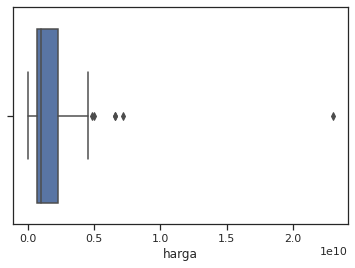

In [367]:
#Visualisasi boxplot untuk melihat outlier
sns.boxplot('harga', data=rumah);


Terdapat outlier yang memiliki rentang data yang jauh berdasarkan harga

# Metode Multivariate

In [368]:
from sklearn.ensemble import IsolationForest
price_num.fillna(price_num.mean(),inplace=True)
clf = IsolationForest(random_state=42).fit(price_num)
clf = np.abs(clf.predict(price_num)==1)

In [369]:
price=price_num[clf]
price.head()

,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0
1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0
2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0
4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0
5,1100000000,81.0,144,3,2.0,1,1,1,0,2200.0


In [370]:
price.shape

(78, 10)

### Removing Outliers Metode Univariate

In [371]:
#Membuat sebuah fungsi untuk menemukan outlier
from numpy import quantile
def outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] <= fence_low) | (df_in[col_name] >= fence_high)]
    return df_out

In [372]:
#Menerapkan fungsi memisahkan outlier dan mendeklarasikannya kedalam suatu variabel
high_price = outlier(rumah, 'harga').reset_index()
high_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,46,6600000000,500.0,800,4,3.0,1,1,1,1,10000.0,SHM
1,54,5000000000,435.0,368,6,4.0,0,0,1,1,3300.0,HGB
2,59,4800000000,200.0,293,6,4.0,0,0,2,2,5500.0,SHM
3,95,23000000000,501.0,510,4,NaN,0,0,2,0,4400.0,HGB
4,96,7139000000,266.0,326,4,4.0,0,0,3,0,4400.0,HGB
5,98,6601100000,386.0,216,4,4.0,0,0,3,0,4400.0,HGB


In [373]:
#Membuat fungsi untuk menemukan data selain outlier
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [374]:
#Menerapkan fungsi menemukan data selain outlier dan mendeklarasikannya kedalam suatu variabel
low_price = remove_outlier(rumah, 'harga').reset_index()
low_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0,SHM
1,1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0,HGB
2,2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0,SHM
3,3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0,SHM
4,4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0,SHM
5,5,1100000000,81.0,144,3,2.0,1,1,1,0,2200.0,SHM
6,6,1925000000,144.0,157,3,3.0,1,1,2,0,2200.0,SHM
7,7,471000000,72.0,40,2,1.0,0,0,1,0,1300.0,SHM
8,8,965000000,65.0,80,3,2.0,1,1,2,0,2200.0,SHM
9,9,2800000000,216.0,200,4,4.0,1,1,1,1,2200.0,SHM


Pada tahap ini kami lebih memilih menggunakan univariate dikarenakan pemahaman kami terhadap domain knowledge belum terlalu banyak

### Memvisualisasikan kembali hasil dari removing outlier

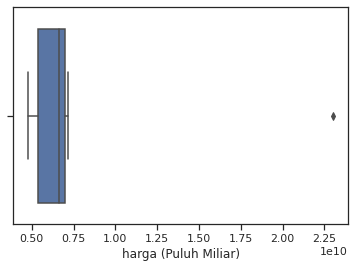

In [375]:
#Visualisasi harga rumah tinggi
sns.boxplot('harga',data=high_price)
plt.xlabel('harga (Puluh Miliar)');


Seperti yang terlihat pada visualisasi terdapat satu pencilan dan setelah kita lihat kembali pada url dari data, ternyata pencilan itu adalah harga dari sebuah villa ditempat wisata yang memiliki harga yang berbeda jauh dengan tempat lainnya. Sehingga dapat disimpulkan pencilan tersebut bukanlah sebuah noise atau error

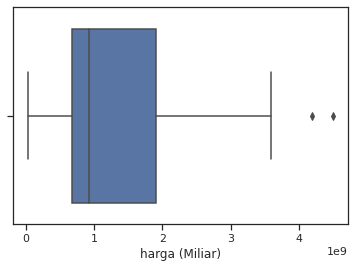

In [376]:
#Visualisasi harga rumah rendah
sns.boxplot('harga',data=low_price);
plt.xlabel('harga (Miliar)');


Visualisasi diatas adalah data selain outlier yang telah dipisahkan sebelumnya

Karena rentang outlier yang terlalu jauh sehingga saat dipisahkan masih terdapat outlier yang tersisa, namun hasil yang sekarang cukup baik untuk diolah dibandingkan sebelumnya

# Missing Values

## Menggunakan simple imputer

### Penanganan High Price SimpleImputer

In [377]:
high = high_price.copy()
high.drop('surat',axis=1,inplace=True)
high.isna().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         1
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
dtype: int64

In [378]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
high['KM'] = imp.fit_transform(high[['KM']])
high

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,46,6600000000,500.0,800,4,3.0,1,1,1,1,10000.0
1,54,5000000000,435.0,368,6,4.0,0,0,1,1,3300.0
2,59,4800000000,200.0,293,6,4.0,0,0,2,2,5500.0
3,95,23000000000,501.0,510,4,4.0,0,0,2,0,4400.0
4,96,7139000000,266.0,326,4,4.0,0,0,3,0,4400.0
5,98,6601100000,386.0,216,4,4.0,0,0,3,0,4400.0


In [379]:
high.isna().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
dtype: int64

### Penanganan Low Price SimpleImputer

In [380]:
low = low_price.copy()
low.drop('surat',axis=1,inplace=True)
low.isna().sum()

index      0
harga      0
LT         1
LB         0
KT         0
KM         2
KTP        0
KMP        0
carport    0
garasi     0
listrik    6
dtype: int64

In [381]:
low['KM'] = imp.fit_transform(low[['KM']])
low['listrik'] = imp.fit_transform(low[['listrik']])
imr = SimpleImputer(np.nan,'mean')
low['LT'] = imr.fit_transform(low[['LT']])
low.head()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
0,0,2750000000,162.0,179,4,3.0,1,1,2,1,2200.0
1,1,1850000000,119.0,126,2,2.0,0,0,1,1,2200.0
2,2,825000000,128.0,65,3,2.0,0,0,1,0,2200.0
3,3,3450000000,224.0,260,4,4.0,1,0,1,0,2200.0
4,4,700000000,77.0,50,3,2.0,0,0,1,0,2200.0


In [382]:
low.isna().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
dtype: int64

## Menggunakan Metode Normal

## Penanganan High Price

In [383]:
#Mengecek adanya data kosong atau missing value
high_price.isna().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         1
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

Terdapat satu missing value pada kamar mandi

In [384]:
#Mengatasi missing value menggunakan median
high_price['KM'].fillna(high_price.KM.median(),inplace=True)
high_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat
0,46,6600000000,500.0,800,4,3.0,1,1,1,1,10000.0,SHM
1,54,5000000000,435.0,368,6,4.0,0,0,1,1,3300.0,HGB
2,59,4800000000,200.0,293,6,4.0,0,0,2,2,5500.0,SHM
3,95,23000000000,501.0,510,4,4.0,0,0,2,0,4400.0,HGB
4,96,7139000000,266.0,326,4,4.0,0,0,3,0,4400.0,HGB
5,98,6601100000,386.0,216,4,4.0,0,0,3,0,4400.0,HGB


In [385]:
#Mengecek kembali apakah masih ada missing value
high_price.isnull().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

## Penanganan Low Price

In [386]:
#Mengecek adanya data kosong atau missing value
low_price.isnull().sum()

index      0
harga      0
LT         1
LB         0
KT         0
KM         2
KTP        0
KMP        0
carport    0
garasi     0
listrik    6
surat      0
dtype: int64

In [387]:
#Imputasi data menggunakan mean dan median
low_price['LT'].fillna(low_price.LT.mean(),inplace=True)
low_price['KM'].fillna(low_price.KM.median(),inplace=True)
low_price['listrik'].fillna(low_price.listrik.median(),inplace=True)

In [388]:
#Mengecek kembali apakah masih ada missing value
low_price.isnull().sum()

index      0
harga      0
LT         0
LB         0
KT         0
KM         0
KTP        0
KMP        0
carport    0
garasi     0
listrik    0
surat      0
dtype: int64

# Statistika Deskriptif

In [389]:
high_price.describe()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,74.666667,8.856683e+09,381.333333,418.833333,4.666667,3.833333,0.166667,0.166667,2.000000,0.666667,5333.333333
std,24.113620,6.992779e+09,124.488821,210.607138,1.032796,0.408248,0.408248,0.408248,0.894427,0.816497,2389.700121
min,46.000000,4.800000e+09,200.000000,216.000000,4.000000,3.000000,0.000000,0.000000,1.000000,0.000000,3300.000000
25%,55.250000,5.400000e+09,296.000000,301.250000,4.000000,4.000000,0.000000,0.000000,1.250000,0.000000,4400.000000
50%,77.000000,6.600550e+09,410.500000,347.000000,4.000000,4.000000,0.000000,0.000000,2.000000,0.500000,4400.000000
75%,95.750000,7.004525e+09,483.750000,474.500000,5.500000,4.000000,0.000000,0.000000,2.750000,1.000000,5225.000000
max,98.000000,2.300000e+10,501.000000,800.000000,6.000000,4.000000,1.000000,1.000000,3.000000,2.000000,10000.000000


In [390]:
low_price.describe()

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik
count,94.000000,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,47.893617,1.320496e+09,114.032258,107.085106,2.744681,2.010638,0.308511,0.255319,1.074468,0.159574,1996.808511
std,28.657213,9.956376e+08,65.312063,72.466034,0.960915,0.989131,0.508563,0.438378,0.420940,0.396305,728.742049
min,0.000000,3.400000e+07,29.000000,29.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,900.000000
25%,23.250000,6.764750e+08,70.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1300.000000
50%,47.500000,9.223475e+08,90.000000,81.000000,3.000000,2.000000,0.000000,0.000000,1.000000,0.000000,2200.000000
75%,72.750000,1.906250e+09,142.500000,140.250000,3.000000,2.750000,1.000000,0.750000,1.000000,0.000000,2200.000000
max,99.000000,4.500000e+09,306.000000,350.000000,7.000000,5.000000,2.000000,1.000000,2.000000,2.000000,4400.000000


# Visualize

# High Price

### Bagaimanakah hubungan yang dimiliki antar variabel dalam data?

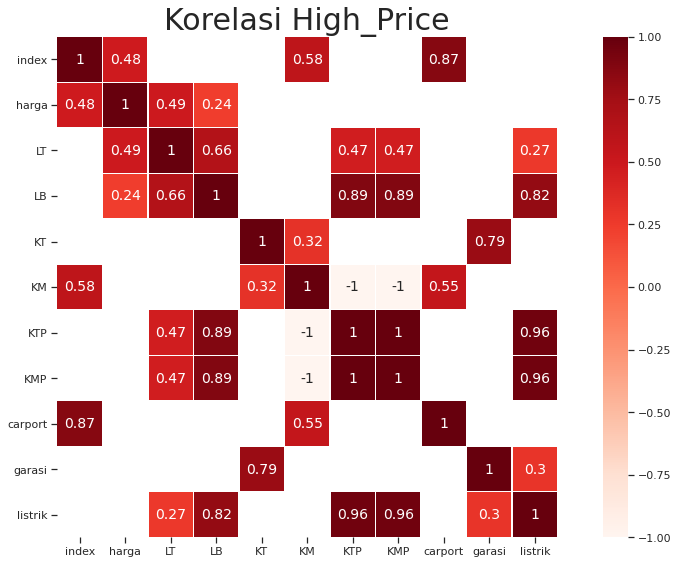

In [391]:
plt.figure(figsize=(13,8))
corr = high_price.corr()
sns.heatmap(corr[(corr > 0.2) | (corr <= -1)], 
            cmap='Reds', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)
plt.title('Korelasi High_Price',fontsize=30)
plt.tight_layout();

Variabel yang mempunyai hubungan yang tidak terlalu kuat terhadap harga adalah:
1.   Luas Tanah
2.   Luas Bangunan

## Apakah ada perbedaan harga berdasarkan surat tanah?

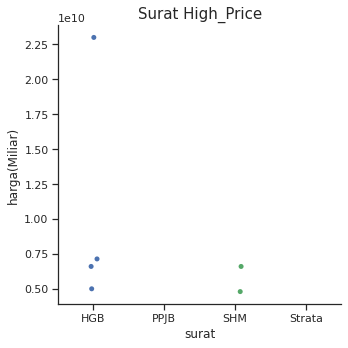

In [392]:
sns.catplot(x='surat',y='harga',data=high_price)
plt.title('Surat High_Price',fontsize=15)
plt.tight_layout()
plt.ylabel('harga(Miliar)');

Harga rumah dengan surat HGB dan SHM hampir memiliki kesamaan, akan tetapi terdapat rumah dengan surat HGB yang memiliki harga tinggi setelah dianalisis dan dilihat kembali terdapat faktor lain yang tidak diketahui menyebabkan hal itu

### Apakah ada perbedaan harga terhadap luas tanah dan luas bangunan?

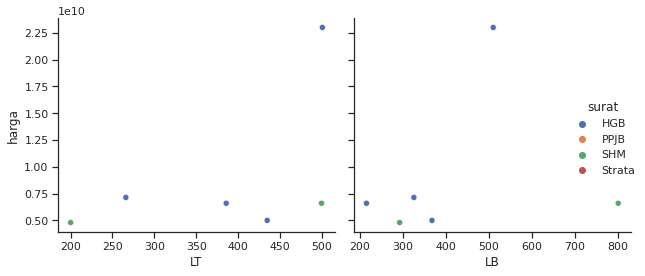

In [393]:
sns.pairplot(high_price,
            x_vars=['LT','LB'],
            y_vars=['harga'],
            hue='surat',
            height=4)
plt.tight_layout()
plt.ylabel('harga(Miliar)');

Luas Tanah tidak terlalu memberikan dampak yang signifikan atas harga penjualan rumah dengan harga tinggi

## Low Price

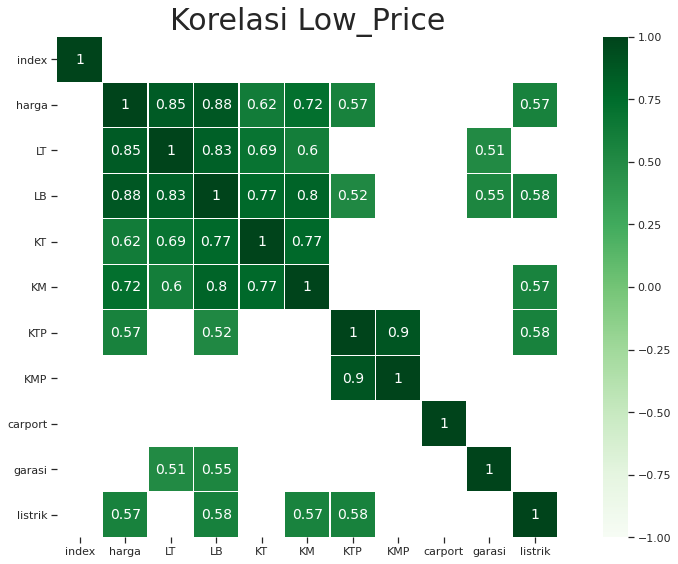

In [394]:
plt.figure(figsize=(13,8))
corr1 = low_price.corr()
sns.heatmap(corr1[(corr1 > 0.5) | (corr1 <= -1)], 
            cmap='Greens', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True)
plt.title('Korelasi Low_Price',fontsize=30)
plt.tight_layout();

Jika berdasarkan hasil dari rumah dengan harga rendah yang memiliki hubungan cukup kuat dengan variabel harga adalah:
- Luas Bangunan
- Luas Tanah
- Kamar Mandi
- Kamar Tidur
- Listrik
- Kamar Tidur Pembantu

## Apakah ada perbedaan harga berdasarkan surat tanah?

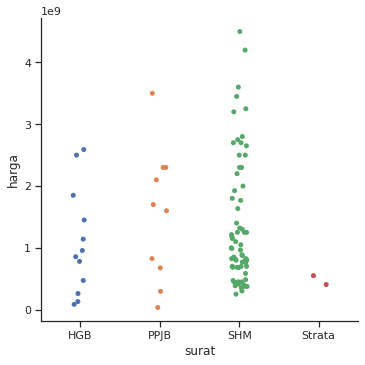

In [395]:
p = sns.catplot(x='surat',y='harga',data=low_price)

Rumah dengan surat SHM cenderung memiliki harga yang paling tinggi dan SHM juga menjadi surat tanah yang paling banyak dimiliki oleh rumah pada umumnya, dilanjut dengan PPJB, HGB, lalu Strata

## Apakah ada perbedaan harga terhadap luas tanah dan luas bangunan?

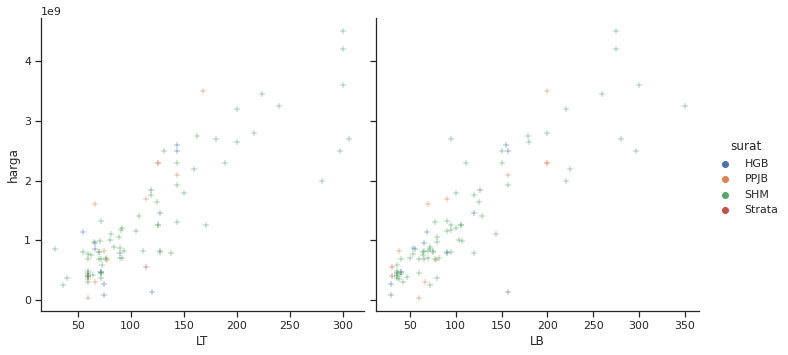

In [396]:
sns.pairplot(low_price,
            x_vars=['LT','LB'],
            y_vars=['harga'],
            hue='surat',
            height=5,markers='+');

Dari visualisasi data diatas untuk rumah dengan harga normal, Luas Tanah dan Luas Bangunan memengaruhi harga jual

### Apakah ada perbedaan harga terhadap jumlah kamar tidur dan kamar mandi?

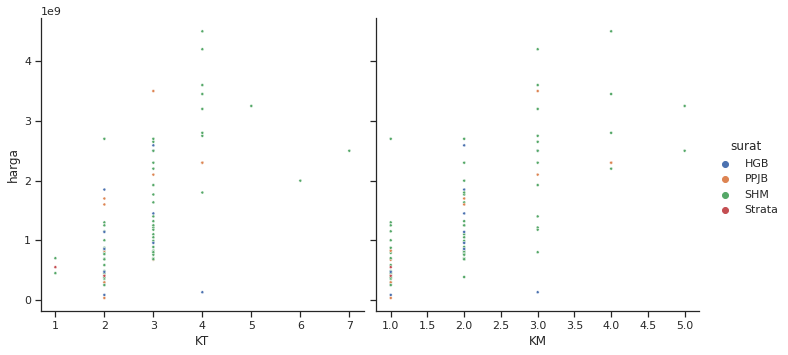

In [397]:
sns.pairplot(low_price,
            x_vars=['KT','KM'],
            y_vars=['harga'],
            hue='surat',
            height=5,
            markers='.');

1. Rumah dengan kamar tidur 4 adalah jumlah yang cocok untuk rumah dengan harga tinggi
2. Kebanyakan kamar mandi 1 memiliki harga yang lebih murah
3. Jika dilihat dari posisi data tertinggi, semakin banyak kamar mandi maka hargapun semakin naik, namun jika terlalu banyak kamar mandi hargapun akan turun. Jumlah ideal untuk banyaknya kamar mandi adalah 4

## Apakah pengaruh kamar tidur pembantu terhadap harga?

Text(43.88909895833335, 0.5, 'harga(Miliar)')

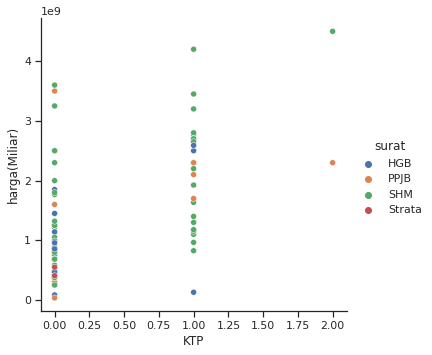

In [398]:
sns.pairplot(low_price,
            x_vars=['KTP'],
            y_vars=['harga'],
            hue='surat',
            height=5)
plt.ylabel('harga(Miliar)')

Kebanyakan rumah yang memiliki 1 atau lebih kamar tidur pembantu adalah rumah yang memiliki harga hampir mencapai 1 miliar keatas walau tidak semua rumah yang berharga demikian memiliki kamar tidur pembantu

## Apakah ada pengaruh daya listrik terhadap harga?

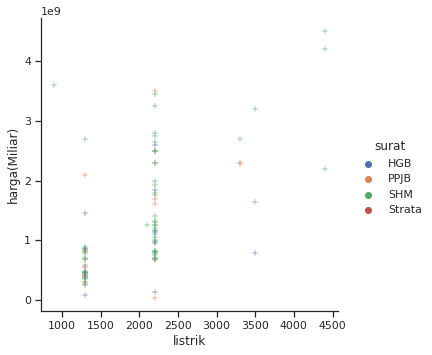

In [399]:
sns.pairplot(low_price,
            x_vars=['listrik'],
            y_vars=['harga'],
            hue='surat',
            height=5,
            markers='+')
plt.ylabel('harga(Miliar)');

1. Untuk rata-rata rumah dibawah 1M menggunakan listrik dengan daya 1300 VA
2. Penggunaan listrik dengan daya 2200 VA adalah daya yang sering digunakan untuk rumah yang memiliki harga dibawah 4M
3. Dan untuk daya lebih tinggi dari 3000 VA mengikuti kebutuhan yang dimiliki oleh pemilik rumah

# Clustering

In [400]:
!pip install --upgrade umap-learn
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py

Requirement already up-to-date: umap-learn in /usr/local/lib/python3.7/dist-packages (0.5.1)
--2021-04-12 10:23:49--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/tau_unsup.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17387 (17K) [text/plain]
Saving to: ‘tau_unsup.py.2’

tau_unsup.py.2      100%[===================>]  16.98K  --.-KB/s    in 0s      

2021-04-12 10:23:49 (71.2 MB/s) - ‘tau_unsup.py.2’ saved [17387/17387]



# Import library

In [401]:
import warnings; warnings.simplefilter('ignore')
import umap, tau_unsup as tau
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI

sns.set(style="ticks", color_codes=True)

# Visualisasi pengelompokan data berdasarkan kategori surat

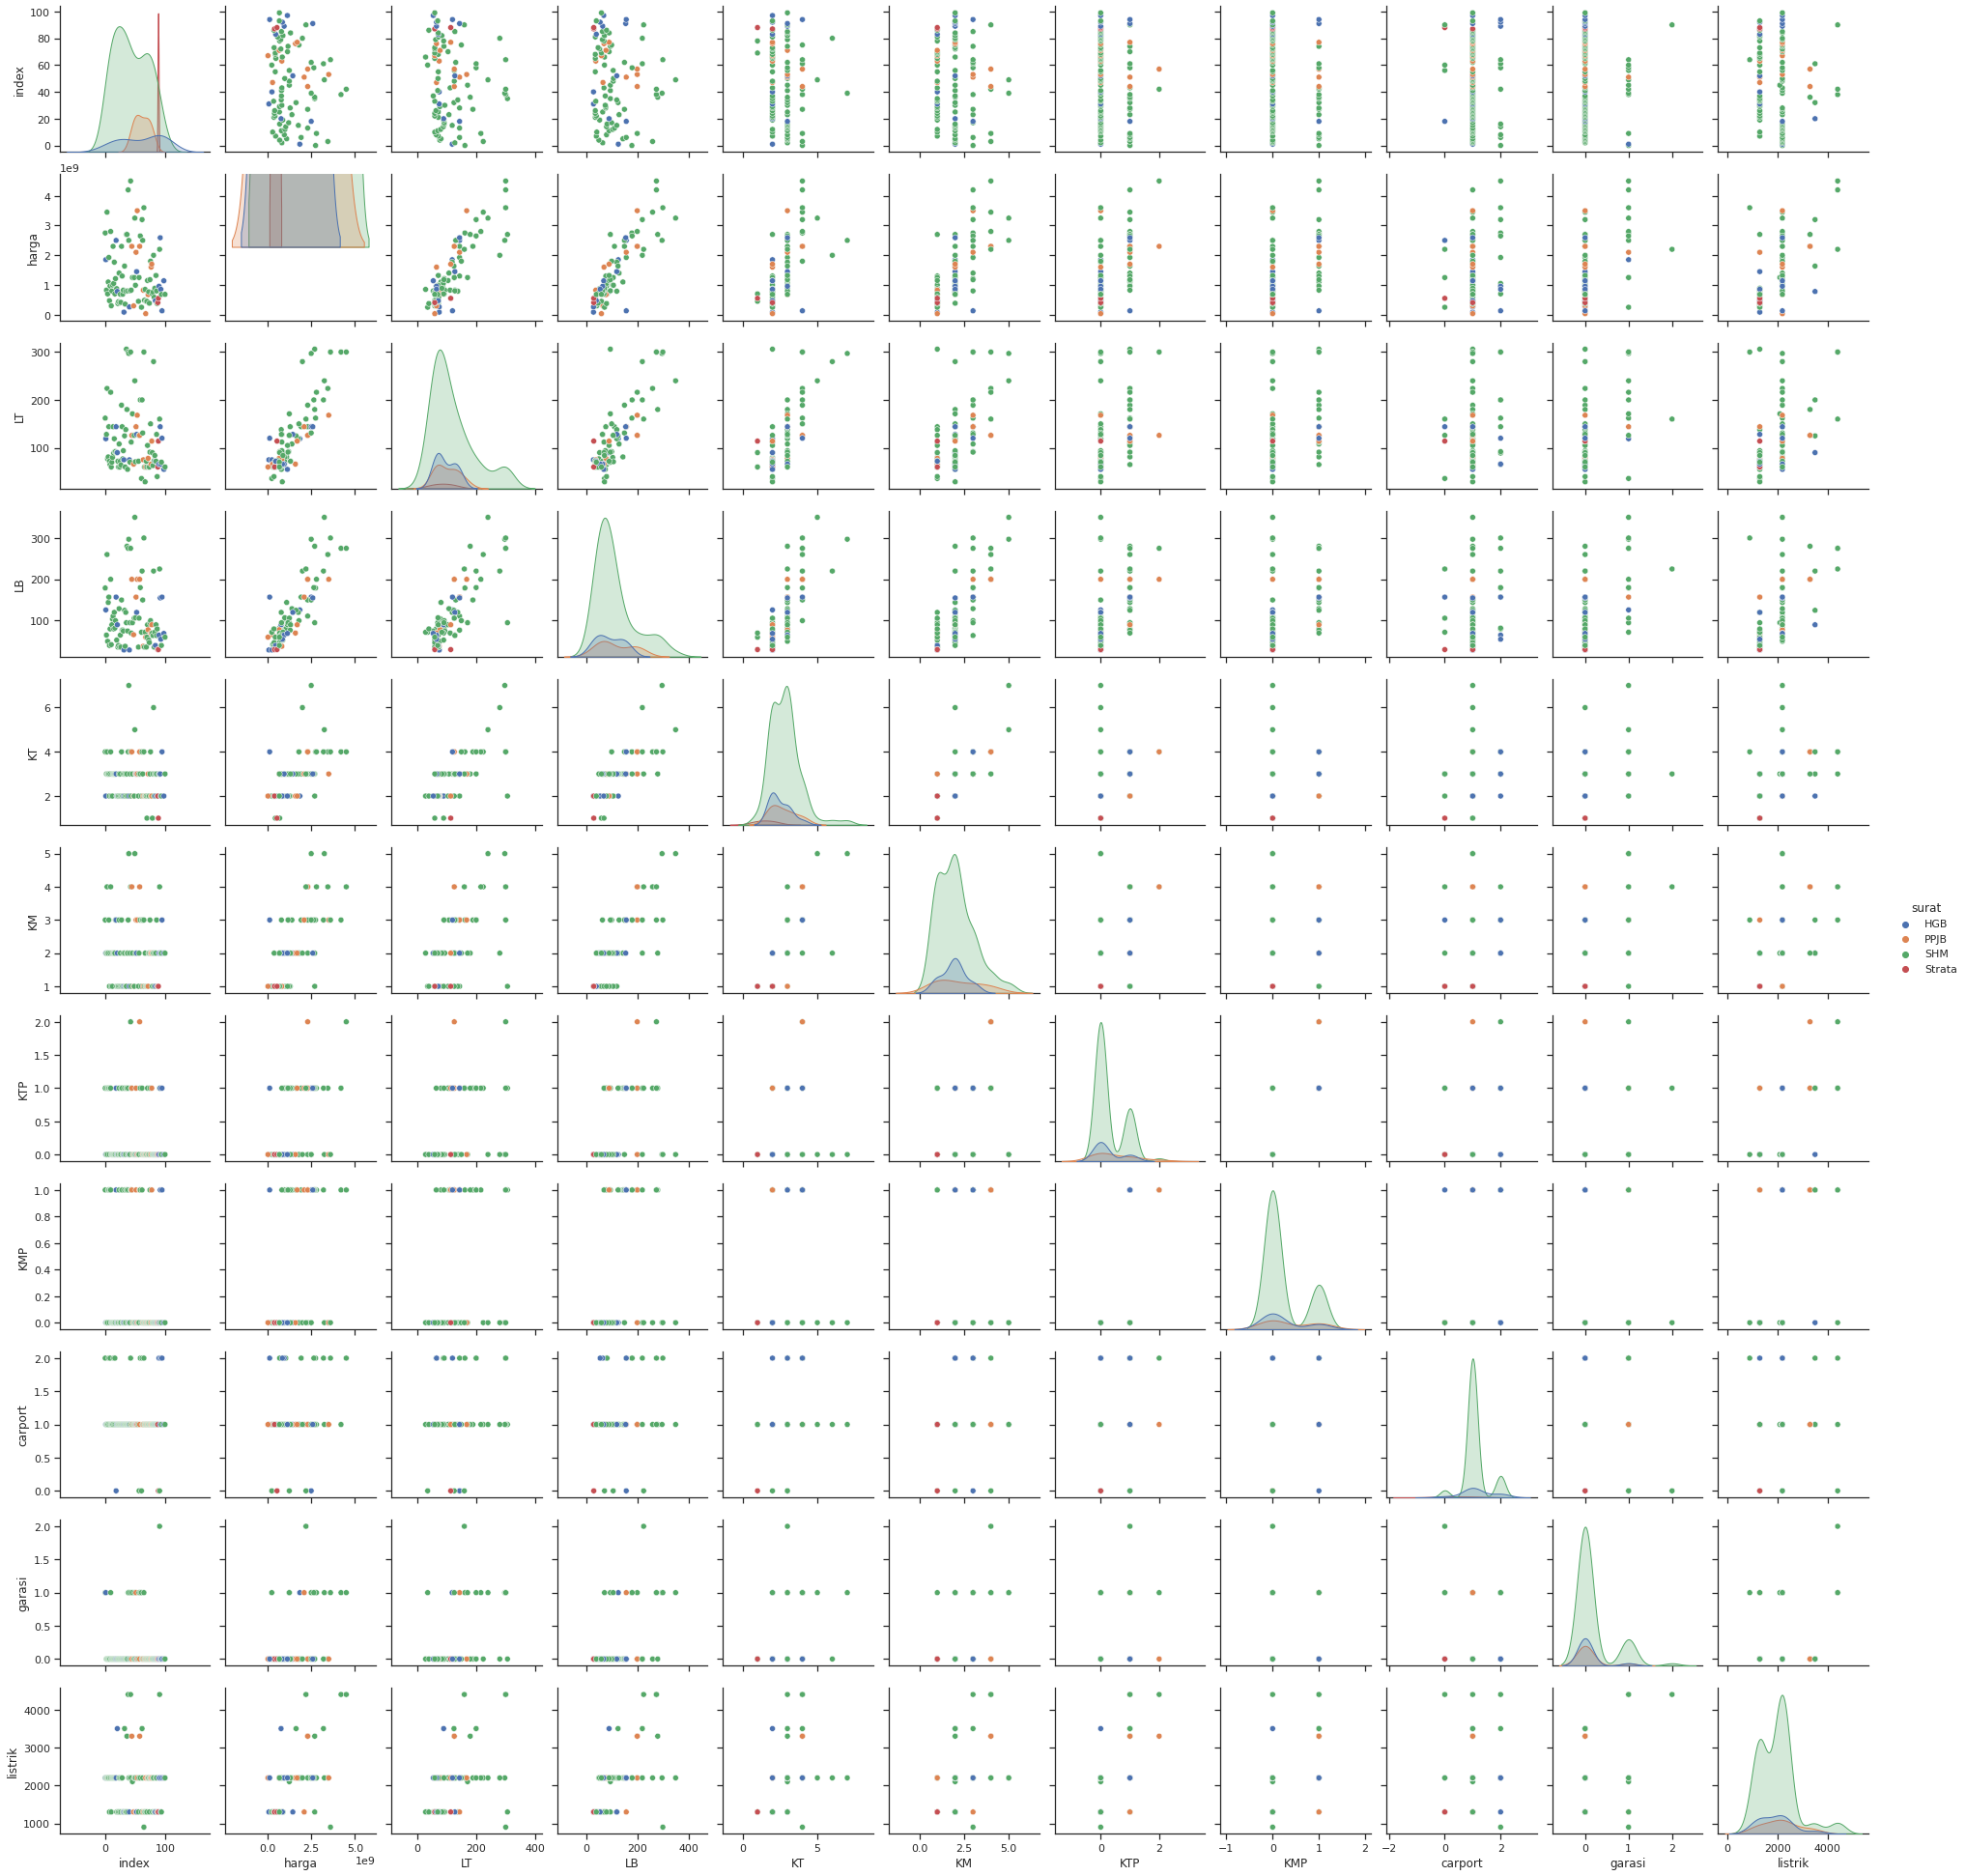

In [402]:
sns.pairplot(low_price,hue='surat');

# Normalisasi

In [417]:
#Mengubah dataframe menjadi array
c_data = np.array(low_price.iloc[:,1:-1])
c_data[:5]

array([[2.75e+09, 1.62e+02, 1.79e+02, 4.00e+00, 3.00e+00, 1.00e+00,
        1.00e+00, 2.00e+00, 1.00e+00, 2.20e+03],
       [1.85e+09, 1.19e+02, 1.26e+02, 2.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 2.20e+03],
       [8.25e+08, 1.28e+02, 6.50e+01, 3.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03],
       [3.45e+09, 2.24e+02, 2.60e+02, 4.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03],
       [7.00e+08, 7.70e+01, 5.00e+01, 3.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 2.20e+03]])

In [418]:
#Scaling data menggunakan MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
c_scaled = mm.fit_transform(c_data)
c_scaled[:5]

array([[0.60815047, 0.4801444 , 0.46728972, 0.5       , 0.5       ,
        0.5       , 1.        , 1.        , 0.5       , 0.37142857],
       [0.40662785, 0.32490975, 0.30218069, 0.16666667, 0.25      ,
        0.        , 0.        , 0.5       , 0.5       , 0.37142857],
       [0.17711599, 0.35740072, 0.11214953, 0.33333333, 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.37142857],
       [0.76489028, 0.70397112, 0.71962617, 0.5       , 0.75      ,
        0.5       , 0.        , 0.5       , 0.        , 0.37142857],
       [0.14912674, 0.1732852 , 0.06542056, 0.33333333, 0.25      ,
        0.        , 0.        , 0.5       , 0.        , 0.37142857]])

In [419]:
#Mengubah array menjadi dataframe
c_scaled = pd.DataFrame(c_scaled)
c_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.608150,0.480144,0.467290,0.500000,0.50,0.5,1.0,1.0,0.5,0.371429
1,0.406628,0.324910,0.302181,0.166667,0.25,0.0,0.0,0.5,0.5,0.371429
2,0.177116,0.357401,0.112150,0.333333,0.25,0.0,0.0,0.5,0.0,0.371429
3,0.764890,0.703971,0.719626,0.500000,0.75,0.5,0.0,0.5,0.0,0.371429
4,0.149127,0.173285,0.065421,0.333333,0.25,0.0,0.0,0.5,0.0,0.371429


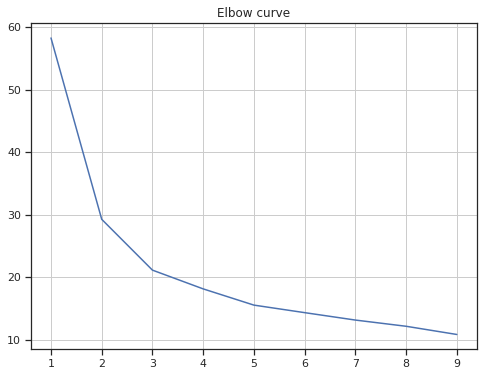

In [420]:
#Menggunakan Elbow Method untuk menentukan banyaknya cluster
distorsions, k1, kN = [], 1, 10
for k in range(k1, kN):
    kmeans = KMeans(n_clusters=k).fit(c_scaled)
    distorsions.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve');

Menurut Elbow Method jumlah cluster adalah 3

# Visualisasi hasil Clustering

array([0, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0,
       0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 1], dtype=int32)

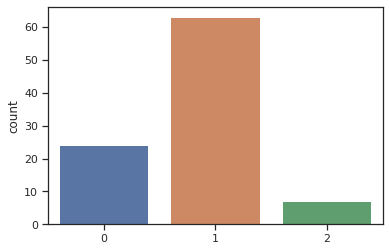

In [421]:
# Menggunakan 3 cluster
kmp = KMeans(n_clusters=3, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp.fit(c_scaled)
C_kmp = kmp.predict(c_scaled)

sns.countplot(C_kmp);
kmp.labels_

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0], dtype=int32)

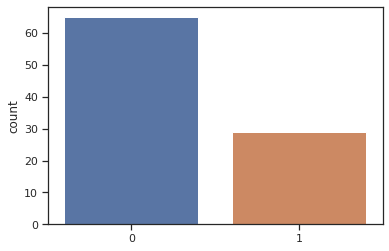

In [422]:
# Menggunakan 2 cluster
kmp1 = KMeans(n_clusters=2, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp1.fit(c_scaled)
C_kmp1 = kmp1.predict(c_scaled)

sns.countplot(C_kmp1);
kmp1.labels_

array([3, 1, 1, 2, 1, 0, 0, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 3, 1, 3, 2, 1, 1, 3, 0,
       3, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 1, 1, 0, 1, 1], dtype=int32)

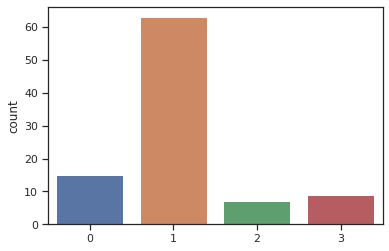

In [423]:
# Menggunakan 4 cluster
kmp2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = 42)
kmp2.fit(c_scaled)
C_kmp2 = kmp2.predict(c_scaled)

sns.countplot(C_kmp2);
kmp2.labels_

# Membentuk Spherical

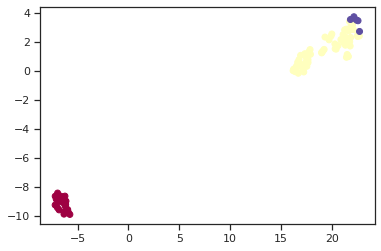

In [424]:
X2D = umap.UMAP(random_state=42).fit_transform(c_scaled)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp, cmap='Spectral');

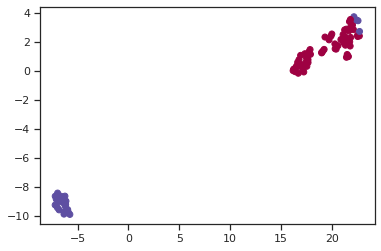

In [425]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp1, cmap='Spectral');

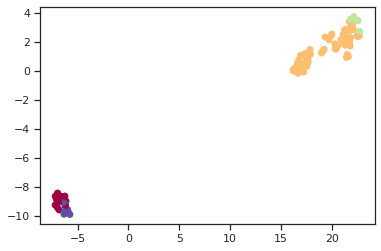

In [426]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmp2, cmap='Spectral');

# Membandingkan Hasil Clustering

In [427]:
Hasil_Clustering = [C_kmp, C_kmp1, C_kmp2]
for res in Hasil_Clustering:
    print(siluet(c_scaled,res), end=', ')

0.560560351579717, 0.5393540652331811, 0.5101623272505693, 

cluster dengan jumlah 3 adalah yang terbaik

# Melihat Letak Centroid

In [428]:
kmp.cluster_centers_

array([[0.47518286, 0.47307461, 0.40900831, 0.36805556, 0.41666667,
        0.54166667, 1.        , 0.625     , 0.125     , 0.47261905],
       [0.1767769 , 0.19380163, 0.12559956, 0.22751323, 0.14285714,
        0.00793651, 0.        , 0.50793651, 0.03174603, 0.24217687],
       [0.64810313, 0.75605982, 0.73386738, 0.5952381 , 0.67857143,
        0.14285714, 0.        , 0.5       , 0.35714286, 0.40816327]])

# Mencari Insight dari hasil klasterisasi

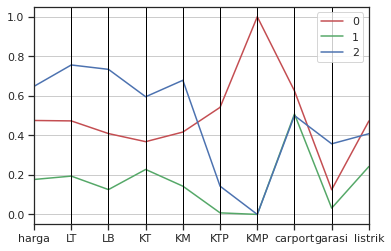

In [429]:
cols = ['harga','LT','LB','KT','KM','KTP','KMP','carport','garasi','listrik']
dfC = pd.DataFrame(kmp.cluster_centers_, columns=cols)
dfC['cluster'] = dfC.index

pd.plotting.parallel_coordinates(dfC, 'cluster', color=('r', 'g', 'b'))
plt.show()

Kelompok 0:
- Memiliki fasilitas mulai dari harga, luas tanah, luas bangunan, kamar tidur, dan kamar mandi yang menengah
- Pasti memiliki kamar tidur pembantu dan kamar mandi  
kamar mandi pembantu
- Kebanyakan rumah memiliki carport 
- Jarang memiliki garasi
- Memiliki daya listrik menengah keatas

Kelompok 1:
- Memiliki fasilitas mulai dari harga, luas tanah, luas bangunan, kamar tidur, dan kamar mandi yang rendah
- Tidak memiliki kamar tidur pembantu dan kamar mandi pembantu
- Terdapat rumah yang memiliki carport tapi ada juga yang tidak (half and half)
- Hanya sedikit rumah yang memiliki garasi
- Memiliki daya listrik menengah kebawah

Kelompok 2:
- Memiliki fasilitas mulai dari harga, luas tanah, luas bangunan, kamar tidur, dan kamar mandi yang cukup tinggi
- Sedikit yang memiliki kamar tidur pembantu tetapi tidak memiliki kamar mandi pembantu
- Terdapat rumah yang memiliki carport tapi ada juga yang tidak (half and half)
- Hampir jarang memiliki garasi
- Memiliki listrik yang bervariasi dari daya rendah ke tinggi

# Memberi label pada dataframe

In [430]:
low_price['cluster'] = kmp.labels_
low_price.head(90)
pd.options.display.max_rows=100
low_price

,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,cluster
0,0,2750000000,162.000000,179,4,3.0,1,1,2,1,2200.0,SHM,0
1,1,1850000000,119.000000,126,2,2.0,0,0,1,1,2200.0,HGB,1
2,2,825000000,128.000000,65,3,2.0,0,0,1,0,2200.0,SHM,1
3,3,3450000000,224.000000,260,4,4.0,1,0,1,0,2200.0,SHM,2
4,4,700000000,77.000000,50,3,2.0,0,0,1,0,2200.0,SHM,1
5,5,1100000000,81.000000,144,3,2.0,1,1,1,0,2200.0,SHM,0
6,6,1925000000,144.000000,157,3,3.0,1,1,2,0,2200.0,SHM,0
7,7,471000000,72.000000,40,2,1.0,0,0,1,0,1300.0,SHM,1
8,8,965000000,65.000000,80,3,2.0,1,1,2,0,2200.0,SHM,0
9,9,2800000000,216.000000,200,4,4.0,1,1,1,1,2200.0,SHM,0


# Visualisasi dengan label yang telah didapat

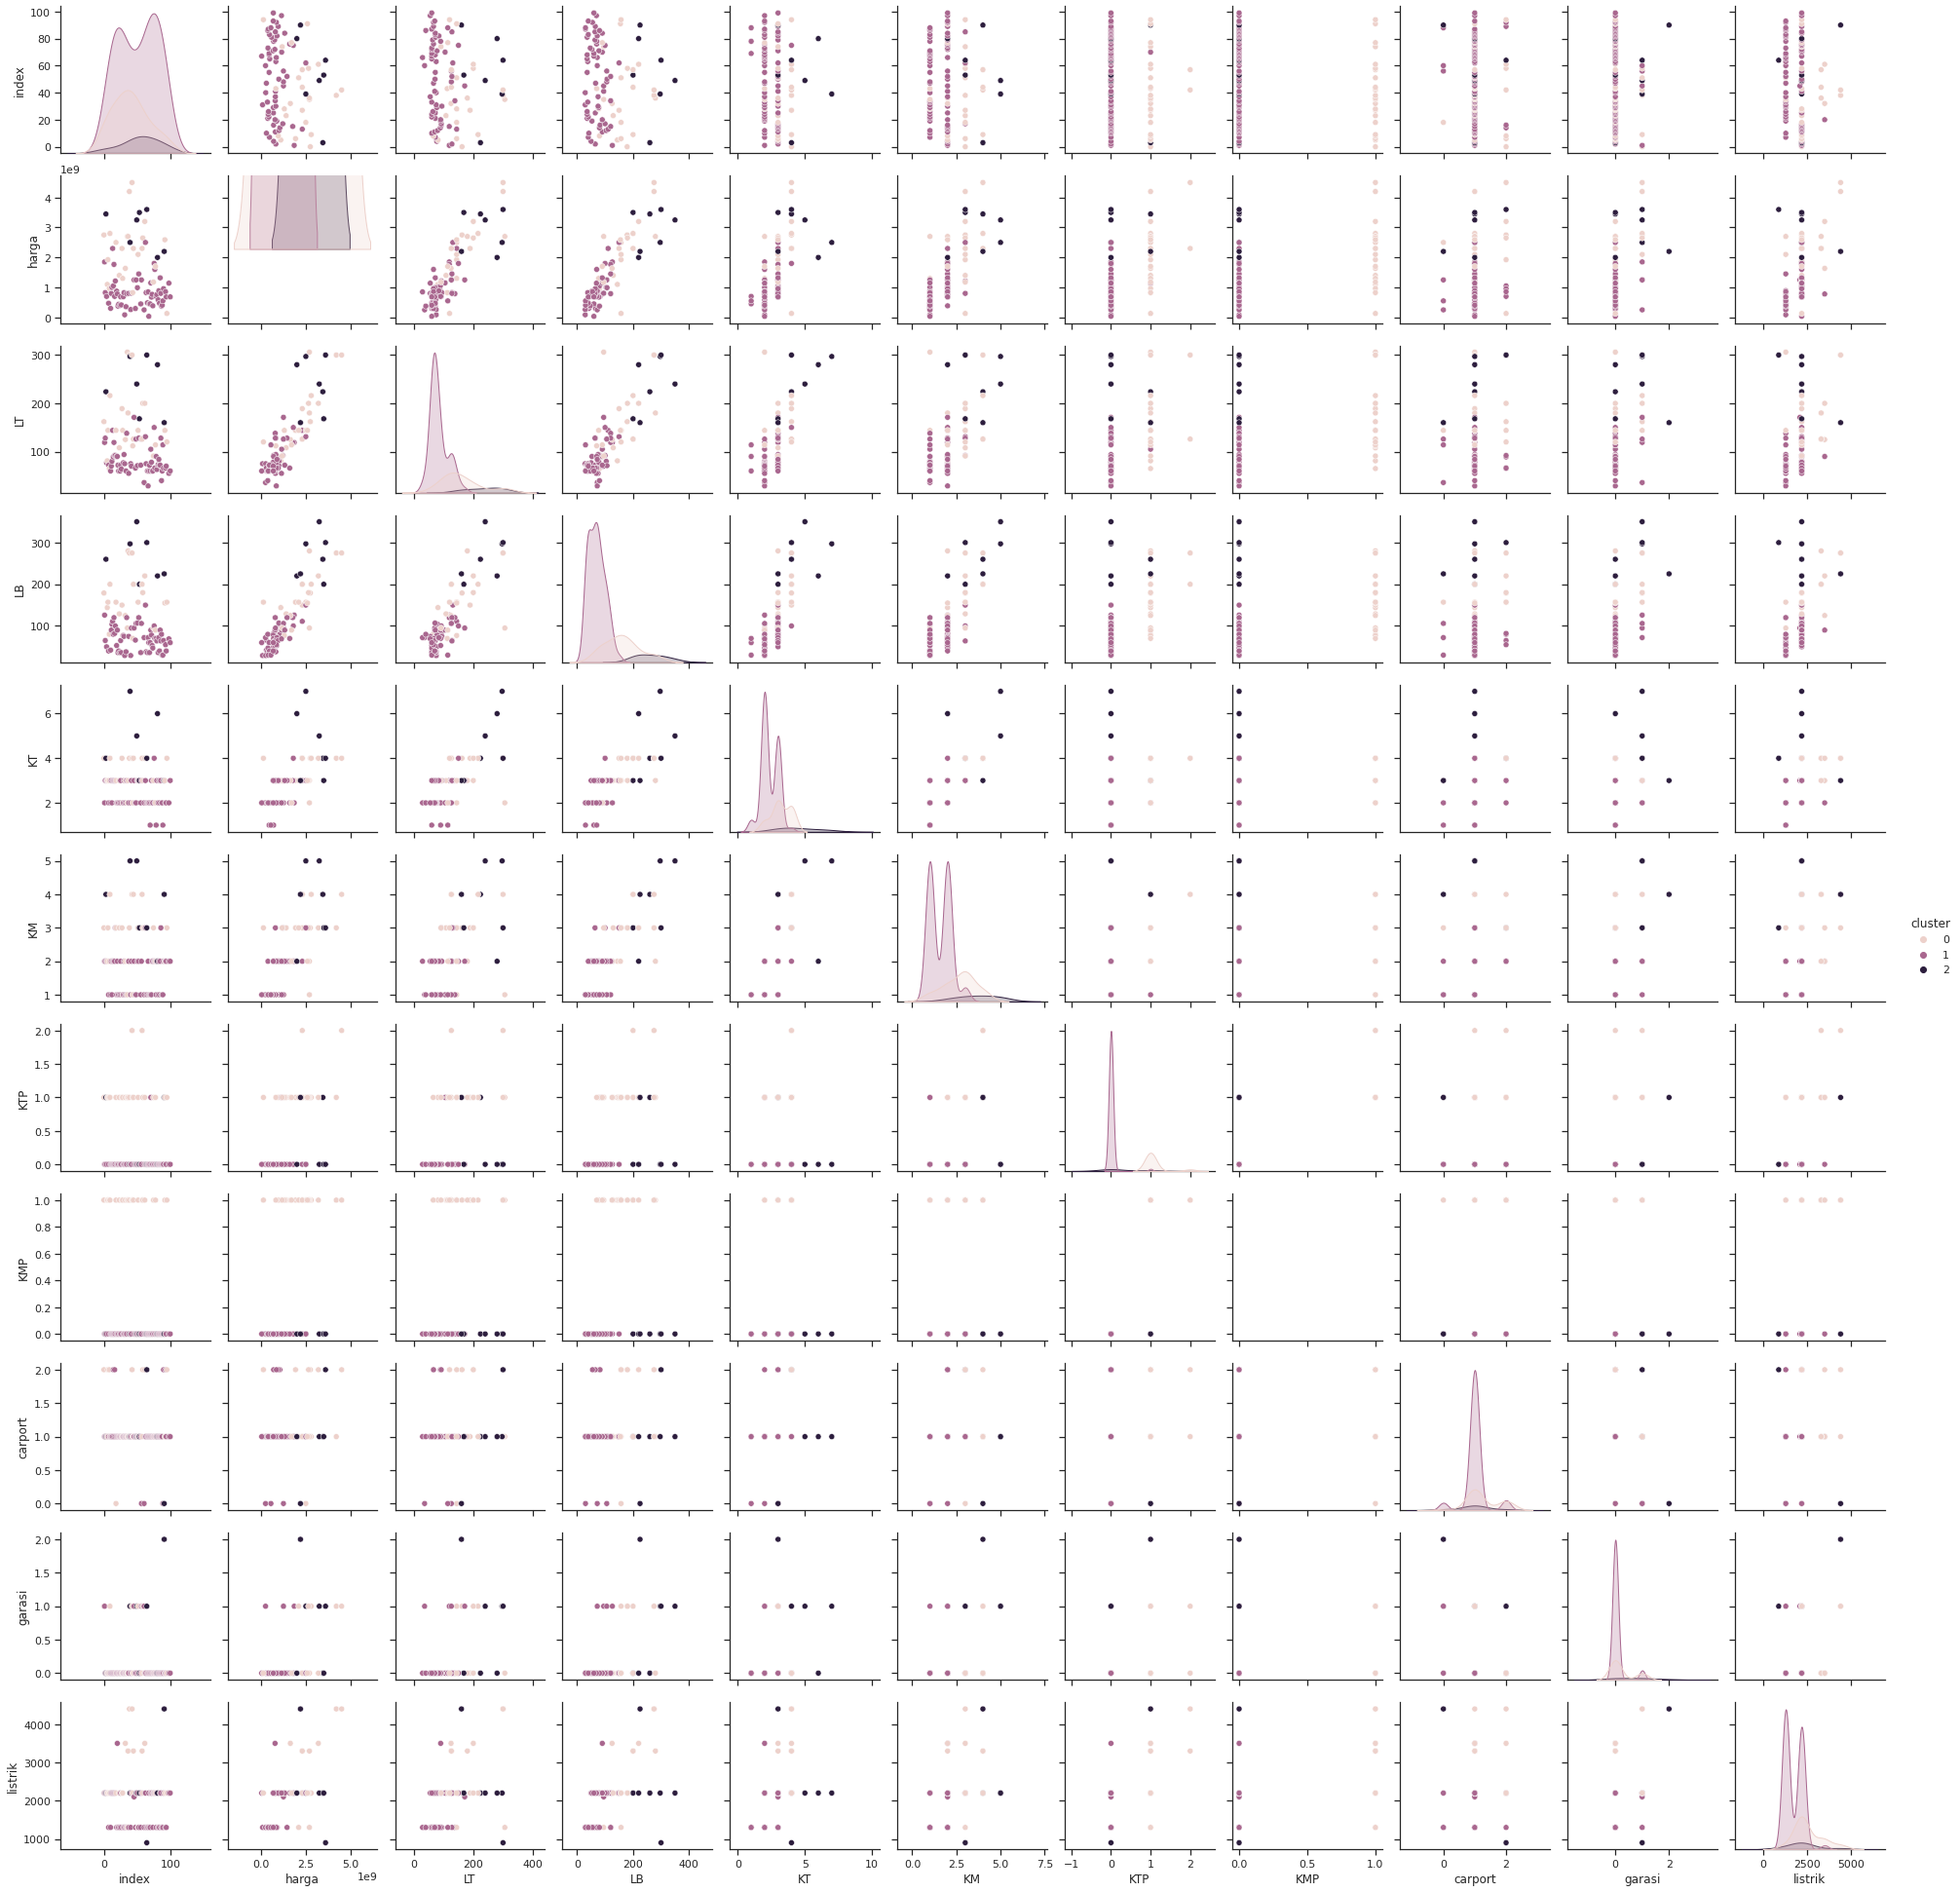

In [431]:
sns.pairplot(low_price,hue='cluster');

# Regresi


In [432]:
low_price.columns

Index(['index', 'harga', 'LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'carport',
       'garasi', 'listrik', 'surat', 'cluster'],
      dtype='object')

# Visualisasi Regresi

In [ ]:
sns.pairplot(low_price,
             x_vars=['LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'carport',
       'garasi', 'listrik'],
             y_vars='harga',
             kind='reg');

# Linear Regression

In [433]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
low_price['surat1']=le.fit_transform(low_price['surat'])
low_price


,index,harga,LT,LB,KT,KM,KTP,KMP,carport,garasi,listrik,surat,cluster,surat1
0,0,2750000000,162.000000,179,4,3.0,1,1,2,1,2200.0,SHM,0,2
1,1,1850000000,119.000000,126,2,2.0,0,0,1,1,2200.0,HGB,1,0
2,2,825000000,128.000000,65,3,2.0,0,0,1,0,2200.0,SHM,1,2
3,3,3450000000,224.000000,260,4,4.0,1,0,1,0,2200.0,SHM,2,2
4,4,700000000,77.000000,50,3,2.0,0,0,1,0,2200.0,SHM,1,2
5,5,1100000000,81.000000,144,3,2.0,1,1,1,0,2200.0,SHM,0,2
6,6,1925000000,144.000000,157,3,3.0,1,1,2,0,2200.0,SHM,0,2
7,7,471000000,72.000000,40,2,1.0,0,0,1,0,1300.0,SHM,1,2
8,8,965000000,65.000000,80,3,2.0,1,1,2,0,2200.0,SHM,0,2
9,9,2800000000,216.000000,200,4,4.0,1,1,1,1,2200.0,SHM,0,2


In [440]:
x = low_price[['LT', 'LB', 'KT', 'KM', 'KTP', 'KMP', 'carport',
       'garasi', 'listrik', 'surat1', 'cluster']]
y = low_price['harga']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [443]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [444]:
lm.predict(x_test)

array([4.12481673e+08, 3.10822830e+08, 2.36273476e+09, 1.21452245e+09,
       1.87081761e+09, 3.19568307e+08, 3.24466528e+09, 1.12247769e+09,
       3.24113720e+08, 2.37004978e+09, 4.00004346e+08, 2.79089736e+09,
       7.14517967e+08, 2.84241050e+08, 1.00203359e+09, 5.84794431e+08,
       2.16937292e+09, 1.32979143e+09, 9.10593912e+08, 3.90222821e+08,
       1.42091178e+09, 4.85462474e+08, 3.99054635e+08, 8.11805408e+08])

In [447]:
lm.score(x_test,y_test)

0.8776897686033125

# Rekomendasi Tindakan
1. Belilah rumah dengan sertifikat tanah SHM karena cenderung memiliki harga tinggi jika dijual
2. Jika ingin rumah yang memiliki luas tanah dan bangunan yang besar belilah rumah yang ada pada cluster ke 2 karena memberikan keuntungan dari segi harga yang diberikan
3. Cluster ke 1 adalah jenis rumah yang cocok untuk keluarga baru yang sederhana
4. Cluster ke 0 adalah jenis rumah yang cocok untuk seorang karyawan yang fokus dengan karirnya dan memiliki keluarga
